In [86]:
# Import data
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib

In [87]:
# Set matplotlib
matplotlib.style.available
matplotlib.style.use('_mpl-gallery')

In [88]:
# Extract data
df = pd.read_csv("Task 4 - Homemade coil.csv", skiprows=20)
df.head()

,Frequency (Hz),Channel 1 Magnitude (dB),Channel 2 Magnitude (dB),Channel 2 Phase (*)
0,100.000000,-0.015644,-57.150583,55.472472
1,101.859139,-0.015745,-57.213857,56.041496
2,103.752842,-0.015595,-57.047677,57.143218
3,105.681751,-0.015586,-56.892673,57.626428
4,107.646521,-0.015631,-56.793732,58.113744


In [89]:
def find_nearest(array, target):
    diff = array - target
    return np.argmin(np.abs(diff))

In [90]:
Freq = np.array(df['Frequency (Hz)'])
Gain = np.array(df['Channel 2 Magnitude (dB)'])
Phase = np.array(df['Channel 2 Phase (*)'])

In [91]:
Cutoff_gain = Gain[find_nearest(Gain, -3)]
Cutoff_freq = Freq[find_nearest(Gain, -3)]

In [92]:
print("This is the cut-off frequency:", Cutoff_freq)

This is the cut-off frequency: 91201.08393559096


Text(0.5, 0, 'Frequency (Hz)')

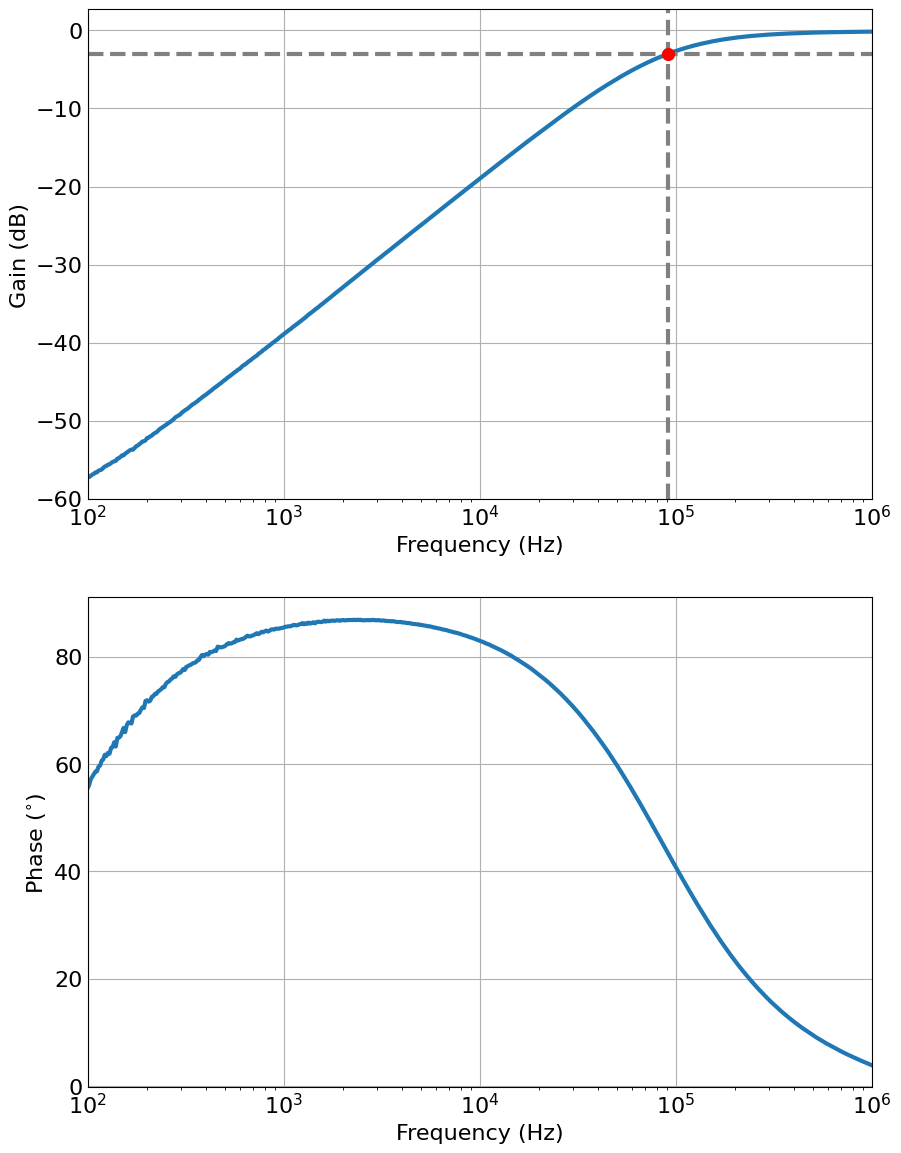

In [93]:
Fig, axs = plt.subplots(nrows=2, ncols= 1, figsize = (8,11))

axs[0].plot(Freq, Gain, linewidth = 3)
axs[0].set_xscale('log')
axs[0].tick_params('both', labelsize = 16)
axs[0].set_ylabel('Gain (dB)', fontsize = 16)
axs[0].set_xlim(np.min(Freq), np.max(Freq))
axs[0].set_xlabel('Frequency (Hz)', fontsize = 16)
axs[0].scatter(Cutoff_freq,Cutoff_gain, color = 'red', zorder = 5, s = 72)
axs[0].axvline(Cutoff_freq, linestyle = '--', linewidth = 3, color = 'grey')
axs[0].axhline(Cutoff_gain, linestyle = '--', linewidth = 3, color = 'grey')


axs[1].plot(Freq, Phase, linewidth = 3)
axs[1].set_xscale('log')
axs[1].tick_params('both', labelsize = 16)
axs[1].set_ylabel('Phase ($^{\circ}$)', fontsize = 16)
axs[1].set_xlim(np.min(Freq), np.max(Freq))
axs[1].set_xlabel('Frequency (Hz)', fontsize = 16)
